In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import random
from collections import defaultdict

In [2]:
def dist(x1, y1, x2, y2):

  return ((x2-x1)**2 + (y2-y1)**2)**(1/2)

In [3]:
def pointToString(qPoint):

  qString = str(qPoint[0]) + ' ' + str(qPoint[1])
  
  return qString

In [4]:
def stringToPoint(qString):

  a_list = qString.split()
  map_object = map(float, a_list)
  qPoint = list(map_object)
  
  return qPoint


In [5]:
def clear(obstacleList,xTest,yTest):

  for obstacle in obstacleList:

    # Each obstacle element holds 
    # xMin, yMin, xMax, yMax coordinates

    if xTest > obstacle[0] and xTest < obstacle[2] and yTest > obstacle[1] and yTest < obstacle[3]:
      return False
    
  return True

In [26]:
def link(obstacleList, xTest, yTest, xDest, yDest):

  # First check if either the starting or end points are inside an obstacle
  if not clear(obstacleList, xTest, yTest) or not clear(obstacleList, xDest, yDest):
    return False
  
  # Calculate step sizes to increment along ray pointing 
  # from (xTest, yTest) to (xDest, yDest)
  dx = xDest - xTest
  dy = yDest - yTest

  step = .5 # Step size

  if abs(dx) > abs(dy):
    dx, dy = (dx / abs(dx)), (dy / abs(dx))

  else:
    dx, dy = (dx / abs(dy)), (dy / abs(dy))

  magV = np.sqrt(dx**2 + dy**2)
  dx, dy = (dx / magV) * step, (dy / magV) * step


  # Initialize incremental points
  xNext, yNext = xTest, yTest
  # ax[0].scatter(xNext, yNext, color = 'm')

  # Interate through ray, checking if each point is inside an obstacle
  while abs(xNext - xDest) > step or abs(yNext - yDest) > step:

    if not clear(obstacleList, xNext, yNext):
      return False

    xNext, yNext = xNext + dx, yNext + dy


  return True

In [7]:
class Tree():
    def __init__(self):
        """
        self.edges is a dict of all possible next nodes
        e.g. {'X': ['A', 'B', 'C', 'E'], ...}
        self.weights has all the weights between two nodes,
        with the two nodes as a tuple as the key
        e.g. {('X', 'A'): 7, ('X', 'B'): 2, ...}
        """
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [8]:
def dijsktra(tree, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = tree.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = tree.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

In [9]:
def extendRRT(T, qRand):

  minDist = float('inf')
  qNear = node

  for node in T.edges:
  
    node = stringToNode(node)
    d = dist(qRand[0], qRand[1], node[0], node[1])
             
    if d < minDist:
      minDist = d
      qNear = node

  dx = xDest - xTest
  dy = yDest - yTest

  if abs(dx) > abs(dy):
    dx, dy = (dx / abs(dx))*step, (dy / abs(dx))*step
  else:
    dx, dy = (dx / abs(dy))*step, (dy / abs(dy))*step

  # Initialize incremental points
  xNext, yNext = xTest + dx, yTest + dy

  return qNear

In [25]:
class RRT():
  def __init__(self,obstacleList, xStart, yStart, xGoal, yGoal, STEP_SIZE, xLeft, xRight, yBottom, yTop):

    self.obstacleList = obstacleList
    self.xStart, self.yStart = xStart, yStart
    self.xGoal, self.yGoal = xGoal, yGoal
    self.STEP_SIZE = STEP_SIZE
    self.xLeft, self.xRight = xLeft, xRight
    self.yBottom, self.yTop = yBottom, yTop

    self.T = Tree()
    self.pathFound = False
    self.end = []
    self.path = None

    self.xSearch, self.ySearch = [], []
    self.numOfNodes = 0

  def extendRRT(self, qRand):

    minDist = float('inf')
    qNear = [self.xStart, self.yStart]

    for node in self.T.edges:
    
      node = stringToPoint(node)
      d = dist(qRand[0], qRand[1], node[0], node[1])
              
      if d < minDist:
        minDist = d
        qNear = node

    dx = qRand[0] - qNear[0]
    dy = qRand[1] - qNear[1]

    if dx == 0:
      dx, dy = 0, 1
    elif dy == 0:
      dx, dy = 1, 0

    elif abs(dx) > abs(dy):
      dx, dy = (dx / abs(dx)), (dy / abs(dx))
    else:
      dx, dy = (dx / abs(dy)), (dy / abs(dy))
    
    magV = np.sqrt(dx**2 + dy**2)
    dx, dy = (dx / magV) *self.STEP_SIZE, (dy / magV) *self.STEP_SIZE

    # Initialize incremental points
    qNew = [qNear[0] + dx, qNear[1] + dy]

    if link(self.obstacleList, qNear[0], qNear[1], qNew[0], qNew[1]):
      weight = dist(qNear[0], qNear[1], qNew[0], qNew[1])
      self.T.add_edge(pointToString(qNear), pointToString(qNew), weight)
      self.numOfNodes += 1
      self.xSearch.append([qNear[0], qNew[0]])
      self.ySearch.append([qNear[1], qNew[1]])

      # plt.plot([qNear[0], qNew[0]], [qNear[1], qNew[1]], color='blue')
      return qNew

    return None

  def iterate(self):

    qRand = [random.randint(xLeft, xRight), random.randint(yBottom, yTop)]

    while True:
      qRand = [random.randint(xLeft, xRight), random.randint(yBottom, yTop)]

      if clear(obstacleList, qRand[0], qRand[1]):
        qNew = self.extendRRT(qRand)
        if qNew != None:
          d = dist(qNew[0], qNew[1], self.xGoal, self.yGoal)

          if d < self.STEP_SIZE:
            self.end = [qNew[0], qNew[1]]
            self.pathFound = True
            return self.T

    return self.T

  def findShortestPath(self):

    if self.pathFound:
      s = [self.xStart, self.yStart]
      start = pointToString(s)
      self.path = dijsktra(self.T, start, pointToString(self.end))

      return self.path



In [11]:
def plotEnvironment(ax,parameters):

  obstacleList = parameters[0]
  xStart, yStart = parameters[1], parameters[2]
  xGoal, yGoal = parameters[3], parameters[4]
  xLeft, xRight = parameters[5], parameters[6]
  yBottom, yTop = parameters[7], parameters[8]

  ax.set_xlim([xLeft, xRight])
  ax.set_ylim([yBottom, yTop])

  ax.set_xticks(np.arange(xLeft, xRight, 1.0))
  ax.set_yticks(np.arange(yBottom, yTop, 1.0))
  
  ax.set_axisbelow(True)
  ax.grid(True, linestyle = "-", color='black')

  start = plt.Circle((xStart, yStart), 1, color='g')
  goal = plt.Circle((xGoal, yGoal), 1, color='r')
  ax.add_patch(start)
  ax.add_patch(goal)

  for obstacle in obstacleList:

    x, y = obstacle[0], obstacle[1]
    width, height = obstacle[2] - obstacle[0], obstacle[3] - obstacle[1]

    rect = Rectangle((x,y),width,height,linewidth=1,edgecolor='grey',facecolor='grey')

    ax.add_patch(rect)

In [12]:
def plotSearch(ax, x, y):

  for i in range(len(x)):
    ax.plot([x[i][0], x[i][1]], [y[i][0], y[i][1]], color = 'blue')


In [13]:
def plotPath(ax, path, parameters):
    
    xPlotPath, yPlotPath = [], []
    if path != None:
      for node in path:
        p = stringToPoint(node)
        xPlotPath.append(p[0])
        yPlotPath.append(p[1])
    xPlotPath.append(parameters[3])
    yPlotPath.append(parameters[4])
    ax.plot(xPlotPath, yPlotPath,color = 'green',linewidth = 4)

In [14]:
def plotRRT(ax, parameters, x, y, path):

  plotEnvironment(ax, parameters)
  plotSearch(ax, x, y)
  plotPath(ax, path, parameters)


In [15]:
### Test case 1

xLeft, xRight, yBottom, yTop = 0, 22, 0, 22

obstacle1 = [6,1,14,5]
obstacle2 = [4,12,12,17]
obstacle3 = [18,9,22,18]

obstacleList = []
obstacleList.append(obstacle1)
obstacleList.append(obstacle2)
obstacleList.append(obstacle3)

xStart, yStart = 2,2
xGoal, yGoal = 14,21

test1_parameters = [obstacleList, xStart, yStart, xGoal, yGoal, xLeft, xRight, yBottom, yTop]

In [16]:
### Test case 2

xLeft, xRight, yBottom, yTop = 0, 22, 0, 22

obstacle1 = [6,1,14,6]
obstacle2 = [4,10,12,17]
obstacle3 = [16,9,22,18]

obstacleList = []
obstacleList.append(obstacle1)
obstacleList.append(obstacle2)
obstacleList.append(obstacle3)

xStart, yStart = 2,2
xGoal, yGoal = 14,21

test2_parameters = [obstacleList, xStart, yStart, xGoal, yGoal, xLeft, xRight, yBottom, yTop]

In [17]:
def main(parameters, STEP_SIZE):

  obstacleList = parameters[0]
  xStart, yStart = parameters[1], parameters[2]
  xGoal, yGoal = parameters[3], parameters[4]
  xLeft, xRight = parameters[5], parameters[6]
  yBottom, yTop = parameters[7], parameters[8]

  r = RRT(obstacleList, xStart, yStart, xGoal, yGoal, STEP_SIZE, xLeft, xRight, yBottom, yTop)
  r.iterate()
  if r.pathFound == True:
    path = r.findShortestPath()
  
  return [path, r.xSearch, r.ySearch, r.numOfNodes]


# Question 2 Part 1

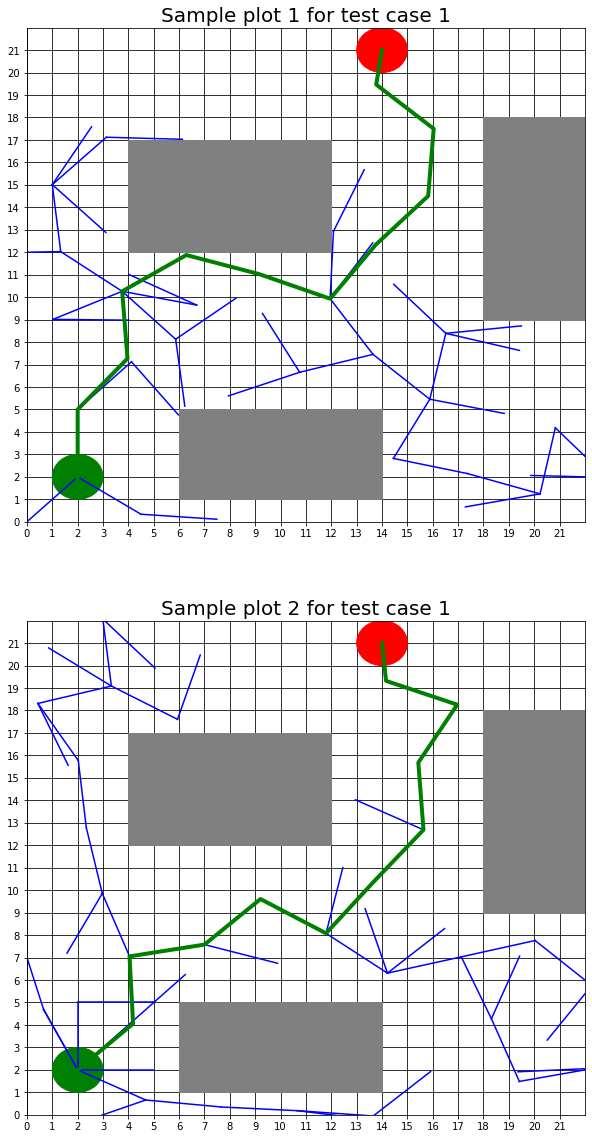

In [37]:
storedPaths = []
storedXSearch = []
storedYSearch = []
STEP_SIZE = 3

n = 2
for i in range(n):

  points = main(test1_parameters, STEP_SIZE)
  storedPaths.append(points[0])
  storedXSearch.append(points[1])
  storedYSearch.append(points[2])

fig, ax = plt.subplots(2, figsize = (10,20))
ax[0].set_title('Sample plot 1 for test case 1',fontsize = 20)
plotRRT(ax[0], test1_parameters, storedXSearch[0], storedYSearch[0], storedPaths[0])

ax[1].set_title('Sample plot 2 for test case 1',fontsize = 20)
plotRRT(ax[1], test1_parameters, storedXSearch[1], storedYSearch[1], storedPaths[1])

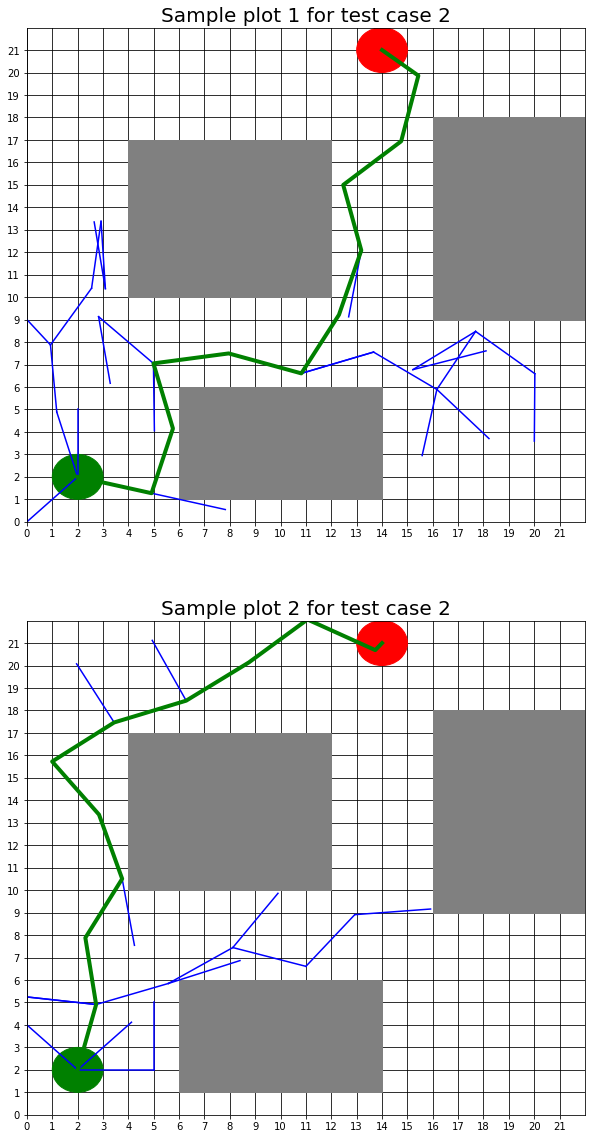

In [44]:
storedPaths = []
storedXSearch = []
storedYSearch = []
STEP_SIZE = 3

n = 2
for i in range(n):

  points = main(test2_parameters, STEP_SIZE)
  storedPaths.append(points[0])
  storedXSearch.append(points[1])
  storedYSearch.append(points[2])

fig, ax = plt.subplots(2, figsize = (10,20))
ax[0].set_title('Sample plot 1 for test case 2',fontsize = 20)
plotRRT(ax[0], test2_parameters, storedXSearch[0], storedYSearch[0], storedPaths[0])

ax[1].set_title('Sample plot 2 for test case 2',fontsize = 20)
plotRRT(ax[1], test2_parameters, storedXSearch[1], storedYSearch[1], storedPaths[1])

## Question 2 Part 2

[229.55, 33.4, 15.55]
[256.15, 30.4, 13.65]


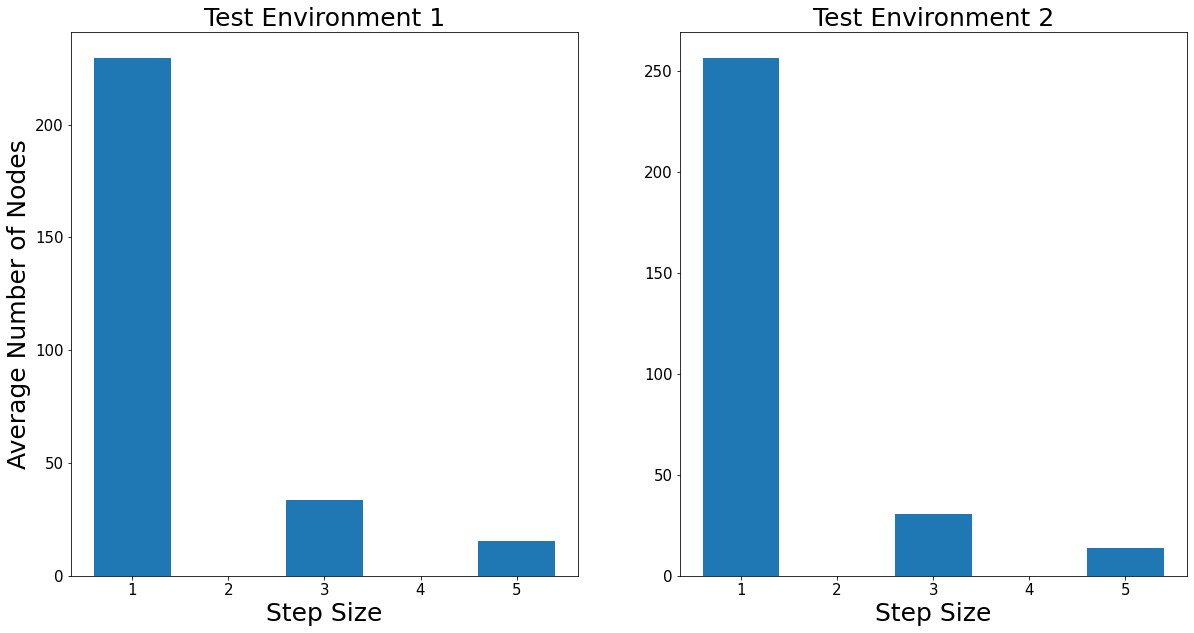

In [46]:
### Test environment 1

STEP_SIZE = [1, 3, 5]
numData = []

for step in STEP_SIZE:

  numOfNodes = []
  for i in range(20):

    data = main(test1_parameters, step)
    numOfNodes.append(data[3])
  
  numData.append(sum(numOfNodes) / len(numOfNodes))

print(numData)

fig, ax = plt.subplots(1,2,figsize = (20,10))
ax[0].bar(STEP_SIZE, numData)
ax[0].set_xlabel('Step Size', fontsize = 25)
ax[0].set_ylabel('Average Number of Nodes', fontsize = 25)
ax[0].set_title('Test Environment 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)

### Test environment 2

numData = []
for step in STEP_SIZE:

  numOfNodes = []
  for i in range(20):

    data = main(test2_parameters, step)
    numOfNodes.append(data[3])
  
  numData.append(sum(numOfNodes) / len(numOfNodes))
  
print(numData)

ax[1].bar(STEP_SIZE, numData)
ax[1].set_xlabel('Step Size', fontsize = 25)
ax[1].set_title('Test Environment 2', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)

